In [20]:
import datetime
import numpy as np
import networkx as nx
import random
from collections import defaultdict
from dateutil.relativedelta import *
from networkx.drawing.nx_agraph import graphviz_layout

from graph import IPv6Graph

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('svg')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams.update({'font.size': 8})
matplotlib.font_manager._rebuild()

In [21]:
def plot_histogram(l, fname, title, bins):
    fig, axs = plt.subplots(1, 1, figsize=(3.25, 2.25))
    plt.hist(l, bins=bins)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(fname, bbox_inches='tight')
    plt.show()
    
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [22]:
start_date = datetime.date(year=2008, month=12, day=1)
end_date = datetime.date(year=2020, month=4, day=1)
ipv6_graph = IPv6Graph(start_date, end_date)
ipv6_nodes_monthly = ipv6_graph.build_graph()

12/2008
# IPv6 nodes:  411
01/2009
# IPv6 nodes:  453
02/2009
# IPv6 nodes:  474
03/2009
# IPv6 nodes:  496
04/2009
# IPv6 nodes:  509
05/2009
# IPv6 nodes:  523
06/2009
# IPv6 nodes:  545
07/2009
# IPv6 nodes:  549
08/2009
# IPv6 nodes:  575
09/2009
# IPv6 nodes:  582
10/2009
# IPv6 nodes:  594
11/2009
# IPv6 nodes:  729
12/2009
# IPv6 nodes:  746
01/2010
# IPv6 nodes:  760
02/2010
# IPv6 nodes:  770
03/2010
# IPv6 nodes:  782
04/2010
# IPv6 nodes:  789
05/2010
# IPv6 nodes:  805
06/2010
# IPv6 nodes:  817
07/2010
# IPv6 nodes:  842
08/2010
# IPv6 nodes:  1005
09/2010
# IPv6 nodes:  1058
10/2010
# IPv6 nodes:  1111
11/2010
# IPv6 nodes:  1145
12/2010
# IPv6 nodes:  1169
01/2011
# IPv6 nodes:  1294
02/2011
# IPv6 nodes:  1341
03/2011
# IPv6 nodes:  1388
04/2011
# IPv6 nodes:  1422
05/2011
# IPv6 nodes:  1702
06/2011
# IPv6 nodes:  1771
07/2011
# IPv6 nodes:  1819
08/2011
# IPv6 nodes:  1855
09/2011
# IPv6 nodes:  1883
10/2011
# IPv6 nodes:  1934
11/2011
# IPv6 nodes:  2214
12/2011
# IP

EOFError: Compressed file ended before the end-of-stream marker was reached

In [26]:
## PART ONE ##########################################################################################################
# Find ASNs from popular websites (according to Alexa database) so that we can compare the statistics from these ASNs
# to the graph at large. 

# Google - 15169 (there are many, see: https://dnslytics.com/search?q=google) 
# Youtube - 36561
# Zhejiang Taobao Network - 24429
# Facebook - 32934 (there's another one too)
# Baidu - 55967
# Tencent - 132203
# Sohu - 58865
# Couldn't find Qihoo 360, and skipped the other Taobao ones
# Yahoo - 10310
# Jingdong 360 - 131486
# Wikipedia - 14907
# Amazon - 16509
# Skip Sina, Weibo (can't find) and Taobao (again)
# Zoom - 30103
# Microsoft (Outlook) - 8075
# Netflix - 2906

# Figure we can start with one, and then expand... or use a different ASN. But this code should be in place regardless)
popular_nodes = set()
popular_nodes.add(15169) # Google
## popular_nodes.add(36561) # YouTube
# popular_nodes.add(24429) # Taobao
popular_nodes.add(32934) # Facebook
#popular_nodes.add(55967) # Baidu
popular_nodes.add(132203) # Tencent
#popular_nodes.add(58865) # Sohu
popular_nodes.add(10310) # Yahoo
popular_nodes.add(131486) # Jingdong 360
popular_nodes.add(14907) # Wikipedia
popular_nodes.add(16509) # Amazon
popular_nodes.add(30103) # Zoom
popular_nodes.add(8075) # Microsoft(Outlook)
popular_nodes.add(2906) # Netflix

for node in popular_nodes:
    print(node)
    print(ipv6_graph.G.nodes[node])

15169
{'ipv6': True, 'time_adopted': datetime.date(2008, 12, 1), 'ipv6_neighbors': [], 'num_neighbors': 113}
10310
{'ipv6': True, 'time_adopted': datetime.date(2010, 12, 1), 'ipv6_neighbors': [174, 286, 559, 852, 1273, 1280, 2497, 2516, 2603, 2857, 2914, 3257, 3292, 3303, 3356, 3549, 4323, 4589, 4637, 4657, 5413, 5568, 6453, 6461, 6730, 6762, 6830, 6939, 7018, 7575, 7660, 8001, 8218, 8359, 8365, 8426, 8447, 8468, 8492, 8763, 8881, 8928, 9002, 9304, 9607, 10026, 11164, 11537, 12399, 12956, 12989, 13030, 13237, 15412, 16150, 19151, 20640, 20932, 23148, 23393, 25560, 29208, 29686, 30844, 30890, 31283, 34695, 36229, 39792, 39912, 41692, 44444, 4436, 9009, 12859, 24875, 26943, 31477, 39326, 293, 3491, 11666, 12714, 29113, 16243, 4826, 12731, 5769, 22822, 3267, 31500, 5539, 2905, 5580, 15598, 29527, 30781, 8596, 8607, 22212, 4739, 9498, 680], 'num_neighbors': 196, 'neighbor_last_adopted': datetime.date(2010, 10, 1)}
32934
{'ipv6': True, 'time_adopted': datetime.date(2012, 5, 1), 'ipv6_neighb

In [27]:
G_ = ipv6_graph.G

# This is looking at how long *after* neighbors adopted IPv6 this node adopted IPv6 as well. 
# For Google, it adopted at the earliest possible time.
months_between_adoption = []
for node in popular_nodes:
    n = G_.nodes[node]
    time_adopted = n.get('time_adopted')
    num_neighbors = n.get('num_neighbors')
    ipv6_neighbors = n.get('ipv6_neighbors')
    if len(ipv6_neighbors) > 0:
        neighbor_last_adopted = n.get('neighbor_last_adopted')
        months = diff_month(time_adopted, neighbor_last_adopted)
        months_between_adoption.append(months)

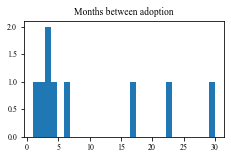

In [28]:
plot_histogram(months_between_adoption, 'figures/case_study_months_between_adoption.pdf', 'Months between adoption', bins=30)

In [29]:
# This is looking at what fraction of neighbors had adopted IPv6 prior to this node adopting it as well
frac_ipv6_neighbors = []
for node in popular_nodes:
    n = G_.nodes[node]
    num_ipv6_neighbors = len(n.get('ipv6_neighbors'))
    num_neighbors = n.get('num_neighbors')
    frac_ipv6_neighbors.append(num_ipv6_neighbors / float(num_neighbors))

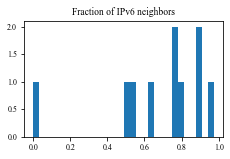

In [30]:
plot_histogram(frac_ipv6_neighbors, 'figures/case_study_frac_ipv6_neighbors.pdf', 'Fraction of IPv6 neighbors', bins=30)

In [31]:
# This is looking at how many neighbors adopted IPv6 the month prior to this node.
frac_ipv6_neighbors_1mo = []
for node in popular_nodes:
    n = G_.nodes[node]
    time_adopted = n.get('time_adopted')
    ipv6_neighbors = n.get('ipv6_neighbors')
    num_ipv6_neighbors = len(ipv6_neighbors)
    num_neighbors = n.get('num_neighbors')
    if num_ipv6_neighbors > 0:
        neighbor_last_adopted = n.get('neighbor_last_adopted')
        months = diff_month(time_adopted, neighbor_last_adopted)
        if months == 1:
            frac_ipv6_neighbors_1mo.append(num_ipv6_neighbors / float(num_neighbors))

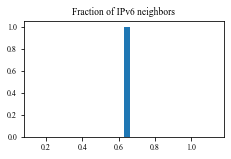

In [32]:
plot_histogram(frac_ipv6_neighbors_1mo, 'figures/case_study_frac_ipv6_neighbors_1mo.pdf', 'Fraction of IPv6 neighbors', bins=30)

In [33]:
cascade_sizes = []
cascade_depths = []
cascade_size_dict = {}
cascade_depth_dict = {}
cascade_size_small = []
initial_nodes = filter(lambda x: len(G_.nodes[x].get('ipv6_neighbors', [0])) == 0, G_.nodes)
# print(len(list(initial_nodes)))
for node in popular_nodes:
    print(node)
    cascade_size = ipv6_graph.calculate_cascade_size(node, set())
    cascade_depth = ipv6_graph.calculate_cascade_depth(node, 0, set())
    cascade_depths.append(cascade_depth)
    cascade_sizes.append(cascade_size)
    if cascade_size < 50 and cascade_depth > 3:
        cascade_size_small.append(node)
    cascade_size_dict[cascade_size] = node
    cascade_depth_dict[cascade_depth] = node

15169
10310
32934
132203
8075
30103
2906
14907
16509
131486


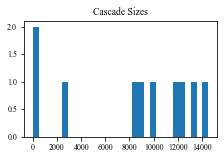

[14525, 11694, 8788, 2592, 12434, 40, 13132, 10125, 8375, 2]
10


In [35]:
plot_histogram(cascade_sizes, 'figures/case_study_cascade_sizes.pdf', 'Cascade Sizes', 30) 
print(cascade_sizes)
print(len(popular_nodes))

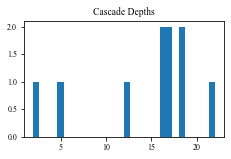

2


In [36]:
plot_histogram(cascade_depths, 'figures/case_study_cascade_depths.pdf', 'Cascade Depths', 30) 
print(cascade_depth)

In [37]:
sorted(cascade_depths, reverse=True)[0:10]

[22, 18, 18, 17, 17, 16, 16, 12, 5, 2]

In [47]:
cascade_depth_dict[2]

131486

In [41]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [53]:
def build_graph(node, seen_nodes, c_G, G):
    time_adopted = G.nodes[node]['time_adopted']
    for neighbor in G.neighbors(node):
        if G.nodes[neighbor].get('ipv6') and G.nodes[neighbor]['time_adopted'] > time_adopted:
            c_G.add_edge(node, neighbor)
            if neighbor not in seen_nodes:
                seen_nodes.add(neighbor)
                c_G = build_graph(neighbor, seen_nodes, c_G, G)
    return c_G

def draw_graph(root_node, G):
    c_G = build_graph(root_node, set(), nx.DiGraph(), G)
    time_adopted_set = set([G.nodes[root_node]['time_adopted']])
    for node in c_G.nodes:
        time_adopted_set.add(G.nodes[node]['time_adopted'])
    time_adopted_list = sorted(list(time_adopted_set))
    node_colors = range(len(time_adopted_list))
    node_color_list = []
    labels = {}
    for node in c_G.nodes:
        labels[node] = time_adopted_list.index(G.nodes[node]['time_adopted'])
        node_color_list.append(node_colors[time_adopted_list.index(G.nodes[node]['time_adopted'])])
    pos=graphviz_layout(c_G, prog='dot')

    nx.draw(c_G, pos=pos, node_color=node_color_list, cmap=plt.cm.Blues, node_size=25, arrow_size=1, width=0.5)

def draw_graphs(root_nodes, fname, G): 
#     plt.subplot(231)
    draw_graph(root_nodes[0], G)
    
#     plt.subplot(232)
#     draw_graph(root_nodes[1], G)
    
#     plt.subplot(233)
#     draw_graph(root_nodes[2], G)
    
#     plt.subplot(234)
#     draw_graph(root_nodes[3], G)
    
#     plt.subplot(235)
#     draw_graph(root_nodes[4], G)
    
#     plt.subplot(236)
#     draw_graph(root_nodes[5], G)


    plt.tight_layout()
    plt.savefig(fname, bbox_inches='tight')
    plt.show()

/anaconda3/envs/15744/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


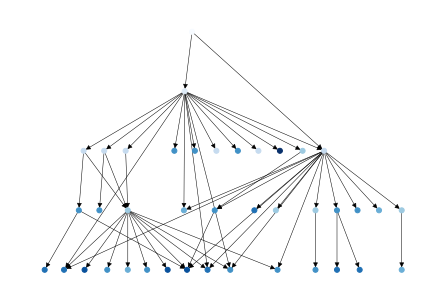

In [54]:
draw_graphs([30103], 'figures/case_study_cascade_examples.pdf', G_)

In [102]:
draw_graphs([14907, 16509, 30103, 8075, 2906], 'figures/case_study_cascade_examples2.pdf')
print(len(list(G.neighbors(10010))))

NameError: name 'G' is not defined

In [103]:
node = random.choice(ipv6_nodes)
print(node)
print(G.nodes[node])

NameError: name 'ipv6_nodes' is not defined

In [104]:
for n in G.neighbors(node):
    print(G.nodes[n])

NameError: name 'G' is not defined

In [105]:
avg_fraction = 0
count = 0
for n in ipv6_nodes:
    node = G.nodes[n]
    if node['time_adopted'] > 0 and node['num_neighbors'] > 0:
        avg_fraction += float(node['ipv6_neighbors']) / node['num_neighbors']
        count += 1
print(avg_fraction/float(count))

NameError: name 'ipv6_nodes' is not defined

In [106]:
(3549, 1) in G.edges

NameError: name 'G' is not defined